# Machine Learning Project for Mining Industry: How to Choose the Best Location to Drill a New Well?

The client company: GlavRosGosNeft. We need to decide where to drill a new well.

Data of oil samples in three regions is provided: in each of 10,000 fields, where the quality of oil and the volume of its reserves have been measured. 

### Project objectives

#### 1) Build a machine learning model to help determine the region where mining will bring the most profit. 

#### 2) Analyze possible profits and risks using the *Bootstrap.* technique

In [57]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None 

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle

from scipy import stats as st # для доверительного интервала

## 1 - Data Opening // Открытие и чтение файлов

In [58]:
data_0 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_0.csv")
data_1 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_1.csv")
data_2 = pd.read_csv("/Users/yuliabezginova/Documents/DS/praktikum/project-7_ML_in_business/geo_data_2.csv")

In [59]:
print(data_0.shape)
print(data_0.head(5))
data_0.info()

(100000, 5)
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [60]:
print(data_1.shape)
print(data_1.head(5))
data_1.info()

(100000, 5)
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [61]:
print(data_2.shape)
print(data_2.head(5))
data_2.info()

(100000, 5)
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [7]:
report_0 = ProfileReport(data_0)
report_0

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
report_1 = ProfileReport(data_1)
report_1

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
report_2 = ProfileReport(data_2)
report_2

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
pd.DataFrame(round(data_0.isna().mean() * 100, )).style.background_gradient('coolwarm')

In [63]:
pd.DataFrame(round(data_1.isna().mean() * 100, )).style.background_gradient('coolwarm')

In [64]:
pd.DataFrame(round(data_2.isna().mean() * 100, )).style.background_gradient('coolwarm')

Удалим столбцы, которые не будут участвовать в моделировании.

In [65]:
data_0 = data_0.drop(columns=['id'])

In [66]:
data_1 = data_1.drop(columns=['id'])

In [67]:
data_2 = data_2.drop(columns=['id'])

**Three datasets are clean and ready for modelling.**

**ВЫВОД: Данные готовы к дальнейшему анализу. По корреляционной матрице Пирсона в данных второго местрождения data_1 прослеживается сильная зависимость (k=1.0) между признаком f2 и таргетом product. Из-за этого может быть низкое значение среднеквадратической ошибки (mean squared error, MSE)**.

Линейная регрессия или обычный метод наименьших квадратов (ordinary least squares, OLS) – это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. **Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями.**

## 2 - Machine Learning Trainig and Model Check for Adequacy // Обучение и проверка модели

### 2.1 Data split into trianing and validation samples // Разобьем данные на обучающую и валидационную выборку

```
We split the sample in the proportion as follows:
- 75% train_data
- 25% validation_data

```

Напишем функцию для деления датасетов на выборки и выделению из них признаков и целевого признака.

In [76]:
def split_func(data):
    train_data, validation_data = train_test_split(data, test_size=0.25, random_state=2355555)
    print('Train sample size (data_2):', train_data.shape[0])
    print('Validation sample size (data_2):', validation_data.shape[0])
    
    train_data_features = train_data.drop(['product'], axis=1)
    train_data_target = train_data['product']
    
    validation_data_features = validation_data.drop(['product'], axis=1)
    validation_data_target = validation_data['product'] # already converted into type 'Series'
    # validation_data_target = pd.Series(validation_data_target)
    # print(type(validation_data_target))
    
    validation_data_target.reset_index(drop=True, inplace=True) # ура
    
    return (train_data_features, 
           train_data_target,
           validation_data_features,
           validation_data_target)

### 2.2 Determine features and targets for the model

In [77]:
train_data_0_features, train_data_0_target, validation_data_0_features, validation_data_0_target = split_func(data_0)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


In [83]:
train_data_1_features, train_data_1_target, validation_data_1_features, validation_data_1_target = split_func(data_1)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


In [84]:
train_data_2_features, train_data_2_target, validation_data_2_features, validation_data_2_target = split_func(data_2)

Train sample size (data_2): 75000
Validation sample size (data_2): 25000


### 2.3 Modelling

**Линейная регрессия или обычный метод наименьших квадратов (ordinary least squares, OLS)** – это самый простой и наиболее традиционный метод регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратическую ошибку (mean squared error) между спрогнозированными и фактическими ответами у в обучающем наборе. 

Среднеквадратичная ошибка равна сумме квадратов разностей между спрогнозированными и фактическими значениями. Линейная регрессия проста, что является преимуществом, но в то же время у нее нет инструментов, позволяющих контролировать сложность модели.

Параметры «наклона» (w), также называемые весами или коэффициентами (coefficients), хранятся в атрибуте coef_, тогда как сдвиг (offset) или константа (intercept), обозначаемая как b, хранится в атрибуте intercept_:


https://github.com/earlgreyness/python-code-conventions

In [85]:
lin_reg_0 = LinearRegression().fit(train_data_0_features, train_data_0_target)

In [86]:
print("R-squared data_0: {}".format(lin_reg_0.score(train_data_0_features, train_data_0_target)))
print("lr.coef_: {}".format(lin_reg_0.coef_))
print("lr.intercept_: {}".format(lin_reg_0.intercept_))

R-squared data_0: 0.27582137638120663
lr.coef_: [  3.81421622 -14.35736273   6.59029776]
lr.intercept_: 77.68335186069056


In [87]:
lin_reg_1 = LinearRegression().fit(train_data_1_features, train_data_1_target)

In [91]:
print("R-squared data_1: {}".format(lin_reg_1.score(train_data_1_features, train_data_1_target)))
print("lr.coef_: {}".format(lin_reg_1.coef_))
print("lr.intercept_: {}".format(lin_reg_1.intercept_))

R-squared data_1: 0.9996233106159619
lr.coef_: [-1.44781028e-01 -2.17133224e-02  2.69516242e+01]
lr.intercept_: 1.655845846452067


In [89]:
lin_reg_2 = LinearRegression().fit(train_data_2_features, train_data_2_target)

In [92]:
print("R-squared data_2: {}".format(lin_reg_2.score(train_data_2_features, train_data_2_target)))
print("lr.coef_: {}".format(lin_reg_2.coef_))
print("lr.intercept_: {}".format(lin_reg_2.intercept_))

R-squared data_2: 0.19582099156406751
lr.coef_: [-0.03742837  0.03198511  5.69847028]
lr.intercept_: 80.86379460484724


FYI

Что за странный символ подчеркивания в конце названий атрибутов coef_ и intercept_? 

Библиотека scikit-learn всегда хранит все, что является производным от обучающих данных, в атрибутах, которые заканчиваются символом подчеркивания. Это делается для того, чтобы не спутать их с пользовательскими параметрами.

ВЫВОДЫ: модель на первом и третьем датасете обучаются плохо, так как значения R-squared низкие. Например, на первом датасете модель обучает только 27% выборки, на третьем - только 19.5%. **Из трех обученных моделей наилучший R-squared = 99.9% получается на втором датасете. Примем эту модель за лучшую и будем использовать для предсказаний на валидационных данных.**

In [93]:
valid_predictions_0 = lin_reg_2.predict(validation_data_0_features)
pred_valid_0 = pd.Series(valid_predictions_0).reset_index(drop=True)

In [94]:
# Calculating RMSE for the model (squared MSE)
mse_0 = mean_squared_error(validation_data_0_target, valid_predictions_0)

In [95]:
valid_predictions_1 = lin_reg_2.predict(validation_data_1_features)
pred_valid_1 = pd.Series(valid_predictions_1).reset_index(drop=True)

In [96]:
# Calculating RMSE for the model (squared MSE)
mse_1 = mean_squared_error(validation_data_1_target, valid_predictions_1)

In [97]:
valid_predictions_2 = lin_reg_2.predict(validation_data_2_features)
pred_valid_2 = pd.Series(valid_predictions_2).reset_index(drop=True)

In [98]:
# Calculating RMSE for the model (squared MSE)
mse_2 = mean_squared_error(validation_data_2_target, valid_predictions_2)

In [99]:
print("MSE_0 =", mse_0)
print("RMSE_0 =", mse_0 ** 0.5)
print()
print("MSE_0 =", mse_1)
print("RMSE_0 =", mse_1 ** 0.5)
print()
print("MSE_0 =", mse_2)
print("RMSE_0 =", mse_2 ** 0.5)

MSE_0 = 1511.5135278489631
RMSE_0 = 38.87818833033457

MSE_0 = 2001.7682251861454
RMSE_0 = 44.74112454092035

MSE_0 = 1592.125800193391
RMSE_0 = 39.90145110385575


FYI
https://habr.com/ru/company/skillfactory/blog/658277/

In [101]:
# константная модель - модель с один признаком
predicted_constant_0 = pd.Series(train_data_0_target.mean(), index=validation_data_0_target.index)
mse_0_constant = mean_squared_error(validation_data_0_target, predicted_constant_0)

print("Mean_0")
print("constant MSE_0 =", mse_0_constant)
print("constant RMSE_0 =", mse_0_constant ** 0.5)

Mean_0
constant MSE_0 = 1961.9077451999567
constant RMSE_0 = 44.29342778787793


In [102]:
# константная модель - модель с один признаком
predicted_constant_1 = pd.Series(train_data_1_target.mean(), index=validation_data_1_target.index)
mse_1_constant = mean_squared_error(validation_data_1_target, predicted_constant_1)

print("Mean_1")
print("constant MSE_1 =", mse_1_constant)
print("constant RMSE_1 =", mse_1_constant ** 0.5)

Mean_1
constant MSE_1 = 2109.529115936322
constant RMSE_1 = 45.92961044834064


In [103]:
# константная модель - модель с один признаком
predicted_constant_2 = pd.Series(train_data_2_target.mean(), index=validation_data_2_target.index)
mse_2_constant = mean_squared_error(validation_data_2_target, predicted_constant_2)

print("Mean_2")
print("constant MSE_2 =", mse_2_constant)
print("constant RMSE_2 =", mse_2_constant ** 0.5)

Mean_2
constant MSE_2 = 2009.3234065492231
constant RMSE_2 = 44.82547720380926


**Показатели качества модели RMSE (Rooted Mean Squared Error) и R-squared важны каждый по-своему. Хотя в реальной жизни больше любят RMSE.** С одной стороны, RMSE сообщает нам типичное расстояние между прогнозируемым значением, сделанным моделью регрессии, и фактическим значением. С другой стороны, R-squared говорит нам, насколько хорошо переменные-предикторы могут объяснить изменение переменной отклика.

- **RMSE:** метрика, которая сообщает нам, насколько в среднем прогнозируемые значения отличаются от наблюдаемых значений в наборе данных. Чем **ниже** RMSE, тем **лучше модель** соответствует набору данных.

- **R-squared**: метрика, которая сообщает нам долю дисперсии переменной отклика регрессионной модели, которая может быть объяснена предикторными переменными. Это значение находится в диапазоне от 0 до 1. Чем **выше** значение R-squared, тем **лучше** модель соответствует набору данных.

###### ВЫВОД: наименьший RMSE получается у первой локации скважины, что говорит модель здесь самая точная. Перейдем к экономической части расчета для принятия решений, какую скважину выбрать.

## 3 - Before Calculating Net Income // Подготовка к расчёту прибыли

### 3.1 Все ключевые значения для расчётов сохраним в отдельных переменных

In [104]:
TOTAL_BOREHOLE = 500
MAX_BOREHOLE = 200
REVENUE_PER_BARREL = 0.45  # в млн руб
BUDGET = 10000  # в млн руб
FAILURE_PROB = 0.025

- location 1

In [105]:
predicted_data_0 = validation_data_0_features.copy()

In [106]:
predicted_data_0['product_predicted'] = lin_reg_2.predict(validation_data_0_features)

In [107]:
predicted_data_0['revenue'] = (predicted_data_0['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [108]:
data_0_500 = predicted_data_0.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

- location 2

In [109]:
predicted_data_1 = validation_data_1_features.copy()

In [110]:
predicted_data_1['product_predicted'] = lin_reg_2.predict(validation_data_1_features)

In [111]:
predicted_data_1['revenue'] = (predicted_data_1['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [112]:
data_1_500 = predicted_data_1.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

- location 3

In [113]:
predicted_data_2 = validation_data_2_features.copy()

In [114]:
predicted_data_2['product_predicted'] = lin_reg_2.predict(validation_data_2_features)

In [115]:
predicted_data_2['revenue'] = (predicted_data_2['product_predicted'] * REVENUE_PER_BARREL).sort_values(ascending=True)

In [116]:
data_2_500 = predicted_data_2.nlargest(TOTAL_BOREHOLE, ['product_predicted'])

### 3.2 Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины. Сравним полученный объём сырья со средним запасом в каждом регионе.

#### 3.2.1 Рассчитаем точку безубыточности (BEP, break even point) как минимальный объем выработки сырья (в тыс. баррелей) для любого месторождения, зная, что бюджет = 10 млрд руб и стоимость тысячи баррелей = 450 тыс. руб.

In [117]:
bep = BUDGET / REVENUE_PER_BARREL
print(
    '{:10.2f} тыс. баррелей сырья минимум необходимо добывать, чтобы покрывать расходы на разбработку месторождения.'.format(
        bep))

  22222.22 тыс. баррелей сырья минимум необходимо добывать, чтобы покрывать расходы на разбработку месторождения.


#### 3.2.2 Учитывая то, что в месторождении будут разрабатывать только 200 лучших скважин, рассчитаем точку безубыточности для каждой скважины в рамках одного месторождения.

In [118]:
bep_200 = bep / 200
print(
    '{:10.2f} тыс. баррелей сырья минимум необходимо добывать, чтобы покрывать расходы на разбработку одной скважины.'.format(
        bep_200))

    111.11 тыс. баррелей сырья минимум необходимо добывать, чтобы покрывать расходы на разбработку одной скважины.


#### 3.2.3 Рассчитаем точки безубыточности для каждого отдельного месторождения. Они должны быть того же порядка, как и среднее значение bep_200.

In [119]:
data_0_500['break_even_point'] = BUDGET / data_0_500['revenue'].mean()
print('Достаточный объем сырья:', round(data_0_500['break_even_point'].mean(), 2))
print('Средний объем запасов в регионе:', round(data_0_500['product_predicted'].mean(), 2))

Достаточный объем сырья: 159.56
Средний объем запасов в регионе: 139.27


In [120]:
data_1_500['break_even_point'] = BUDGET / data_1_500['revenue'].mean()
print('Достаточный объем сырья:', round(data_1_500['break_even_point'].mean(), 2))
print('Средний объем запасов в регионе:', round(data_1_500['product_predicted'].mean(), 2))

Достаточный объем сырья: 202.53
Средний объем запасов в регионе: 109.73


In [121]:
data_2_500['break_even_point'] = BUDGET / data_2_500['revenue'].mean()
print('Достаточный объем сырья:', round(data_2_500['break_even_point'].mean(), 2))
print('Средний объем запасов в регионе:', round(data_2_500['product_predicted'].mean(), 2))

Достаточный объем сырья: 155.53
Средний объем запасов в регионе: 142.88


**ВЫВОД: все три региона с исследованными 500 скажиннами укладываются в бюджет; дешевле всего по себестоимости обойдется второй регион, дороже всего - третий.**

## 4 - Calculating Net Income and Risk Ration // Расчёт прибыли и рисков 

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.

- Бюджет на разработку скважин в регионе — 10 млрд рублей.

- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.

- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. **Среди них выбирают регион с наибольшей средней прибылью.**

### 4.1 Выберем скважины с максимальными значениями предсказаний.

Целевая метрика эксперимента: 0.95-квантиль этого распределения.

То есть отбрасываем 5% самых больших значений, а для остальных ищем максимум.
Нужно оценить 95%-й доверительный интервал для 0.99-квантили (для 99% скважин из выбранных случайно 500 штук).

Сперва создадим подвыборки для бутстрепа с помощью функции sample().

**Для экономического расчета будем использовать валидационную выборку validation_data_0_features, в которой 25000 наблюдений. На этих данных будем формировать предсказания, считать прибыль и сравнить с фактическими данными validation_data_0_target.**

Сформируем предсказания на валидационных данных и оцениним значение RMSE для каждого месторождения.

In [122]:
predicted_0 = pd.Series(lin_reg_2.predict(validation_data_0_features))  # product prediction at location 1
rmse_0 = mean_squared_error(validation_data_0_target, predicted_0) ** 0.5

print("RMSE = {}".format(round(rmse_0, 2)))
print("Cредний запас предсказанного сырья: {} тыс. баррелей".format(round(predicted_0.mean(), 2)))

RMSE = 38.88
Cредний запас предсказанного сырья: 95.14 тыс. баррелей


In [123]:
predicted_1 = pd.Series(lin_reg_2.predict(validation_data_1_features))  # product prediction at location 2
rmse_1 = mean_squared_error(validation_data_1_target, predicted_1) ** 0.5

print("RMSE = {}".format(round(rmse_1, 2)))
print("Cредний запас предсказанного сырья: {} тыс. баррелей".format(round(predicted_1.mean(), 2)))

RMSE = 44.74
Cредний запас предсказанного сырья: 94.83 тыс. баррелей


In [124]:
predicted_2 = pd.Series(lin_reg_2.predict(validation_data_2_features))  # product prediction at location 3
rmse_2 = mean_squared_error(validation_data_2_target, predicted_2) ** 0.5

print("RMSE = {}".format(round(rmse_2, 2)))
print("Cредний запас предсказанного сырья: {} тыс. баррелей".format(round(predicted_2.mean(), 2)))

RMSE = 39.9
Cредний запас предсказанного сырья: 95.41 тыс. баррелей


**Создадим три новых датасета для трех месторождений, каждый из которых состоит из двух колонок: исходные значения объема выработки 'product' из валидационных данных validation_data_0_target и предсказания 'predicted'.** Напишем для этого функцию.

In [125]:
def df_function(predicted, product):
    predicted1 = predicted.reset_index(drop=True)  #change tony
    product1 = product.reset_index(drop=True)  #change tony

    pp = {
        'predicted': predicted1,
        'product': product1
    }

    product_and_predicted = pd.DataFrame(data=pp)
    return product_and_predicted  #change tony

In [126]:
product_and_predicted_0 = df_function(predicted_0, validation_data_0_target)

In [127]:
#код ревьюера
predicted_0.head()

0    103.259711
1    144.736629
2    124.099917
3    118.245416
4    106.524526
dtype: float64

In [128]:
#код ревьюера
validation_data_0_target.head()

0    134.321817
1    162.649604
2    153.376696
3    111.405536
4    131.971286
Name: product, dtype: float64

In [129]:
#код ревьюера
product_and_predicted_0.head()

predicted     product
0  103.259711  134.321817
1  144.736629  162.649604
2  124.099917  153.376696
3  118.245416  111.405536
4  106.524526  131.971286

In [130]:
product_and_predicted_1 = df_function(predicted_1, validation_data_1_target)

In [131]:
product_and_predicted_2 = df_function(predicted_2, validation_data_2_target)

### 4.2 Просуммируем целевое значение объёма сырья, соответствующее этим предсказаниям.

**Из полученных выше новых датасетов с двумя колонками product, preducted, выберем 200 наилучших скважин по значению объемов predicted и рассчитаем средний фактический объем из исходных данных product.** Напишем для скорости функцию, где значение MAX_BOREHOLE=200.

In [134]:
def sum_actual_product(data):
    actual_product = data['product'].sum()
    return actual_product

In [135]:
actual_target_0 = sum_actual_product(product_and_predicted_0)
print(
    "Целевое значение объёма сырья, соответствующее предсказаниям: {} тыс. баррелей".format(round(actual_target_0, 2)))

Целевое значение объёма сырья, соответствующее предсказаниям: 2312765.73 тыс. баррелей


In [136]:
actual_target_1 = sum_actual_product(product_and_predicted_1)
print(
    "Целевое значение объёма сырья, соответствующее предсказаниям: {} тыс. баррелей".format(round(actual_target_1, 2)))

Целевое значение объёма сырья, соответствующее предсказаниям: 1714138.25 тыс. баррелей


In [137]:
actual_target_2 = sum_actual_product(product_and_predicted_2)
print(
    "Целевое значение объёма сырья, соответствующее предсказаниям: {} тыс. баррелей".format(round(actual_target_2, 2)))

Целевое значение объёма сырья, соответствующее предсказаниям: 2377017.23 тыс. баррелей


### 4.3 Рассчитаем прибыль для полученного объёма сырья

In [143]:
def calc_net_income(product_and_predicted, count):
    pred_sorted = product_and_predicted.sort_values(by='predicted', ascending=False) # '000
    selected = product_and_predicted['product'][pred_sorted.index][:count].sum() # '000
    net_income = round(((selected * REVENUE_PER_BARREL) - BUDGET), 2)
    return net_income

In [144]:
net_income_0 = calc_net_income(product_and_predicted_0, 200)
print(f'Чистая прибыль: {net_income_0} млн руб')

Чистая прибыль: 2715.46 млн руб


In [145]:
net_income_1 = calc_net_income(product_and_predicted_1, 200)
print(f'Чистая прибыль: {net_income_1} млн руб')

Чистая прибыль: 2415.09 млн руб


In [146]:
net_income_2 = calc_net_income(product_and_predicted_2, 200)
print(f'Чистая прибыль: {net_income_2} млн руб')

Чистая прибыль: 2549.98 млн руб


### 4.4 Bootstrap для расчета рисков

In [148]:
def net_income_bootstrap(product_and_predicted):
    state = np.random.RandomState(12345)
    values = []
    count = 0

    for i in range(1000):
        target_subsample = product_and_predicted['product'].sample(n=500, replace=True, random_state=state)
        pred_subsample = product_and_predicted['predicted'][target_subsample.index]
        net_income = calc_net_income(df_function(pred_subsample, target_subsample), 200)
        values.append(net_income)

        # проверяем не является выборка убыточной, если является, то увеличиваем счетчик
        if net_income < 0:
            count += 1

    values = pd.Series(values)
    lower = values.quantile(0.01)
    upper = values.quantile(0.99)

    mean = values.mean()
    confidence_interval = st.t.interval(0.95, len(values) - 1, mean, np.std(values, ddof=1))

    print('Средняя прибыль с 200 лучших скважин: {} млн руб'.format(mean))
    print()
    print("1%-квантиль:", lower, "млн руб")
    print("99%-квантиль:", upper, "млн руб")
    print()
    print("95%-ый доверительный интервал:", confidence_interval, "млн руб")

    pvalue = 1. * count / 1000  # bootstrap interations
    if pvalue < FAILURE_PROB:
        print("Вероятность убытков равна {:.2%} и является меньше допустимой, регион подходит по критериям".format(
            pvalue))
    else:
        print("Вероятность убытков равна {:.2%} и является больше допустимой, регион НЕ подходит по критериям".format(
            pvalue))

        # построим распределение выручки по региону
    plt.figure()
    _ = plt.hist(values, bins=100)

    # левая граница доверительного интервала
    one_x12, one_y12 = [confidence_interval[0], confidence_interval[0]], [0, 30]
    # правая граница доверительного интервала
    two_x12, two_y12 = [confidence_interval[1], confidence_interval[1]], [0, 30]
    plt.title('Гистограмма распределения прибыли')
    plt.xlabel('Прибыль в млн. рублей')
    plt.plot(one_x12, one_y12, two_x12, two_y12, marker='o')

#### 4.4.1 Bootstrap на исходных данных 1-го местророждения data_0

Средняя прибыль с 200 лучших скважин: 296.0139099999996 млн руб

1%-квантиль: -344.9683 млн руб
99%-квантиль: 932.4391999999999 млн руб

95%-ый доверительный интервал: (-218.9392440993525, 810.9670640993518) млн руб
Вероятность убытков равна 11.80% и является больше допустимой, регион НЕ подходит по критериям


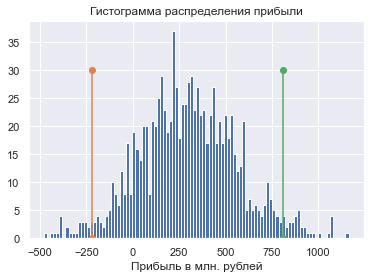

In [150]:
net_income_bootstrap(product_and_predicted_0)

#### 4.4.2 Bootstrap на исходных данных 2-го местророждения data_1

Средняя прибыль с 200 лучших скважин: 414.8357000000001 млн руб

1%-квантиль: -56.0397 млн руб
99%-квантиль: 879.37 млн руб

95%-ый доверительный интервал: (16.254760668259735, 813.4166393317405) млн руб
Вероятность убытков равна 2.40% и является меньше допустимой, регион подходит по критериям


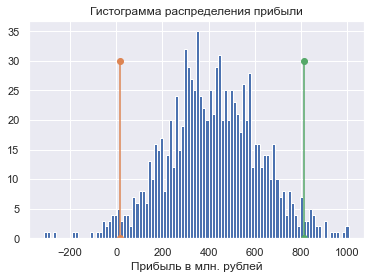

In [151]:
net_income_bootstrap(product_and_predicted_1)

#### 4.4.3 Bootstrap на исходных данных 3-го местророждения data_2

Средняя прибыль с 200 лучших скважин: 447.19702000000063 млн руб

1%-квантиль: -172.288 млн руб
99%-квантиль: 1051.9417999999998 млн руб

95%-ый доверительный интервал: (-93.78258798842103, 988.1766279884223) млн руб
Вероятность убытков равна 4.90% и является больше допустимой, регион НЕ подходит по критериям


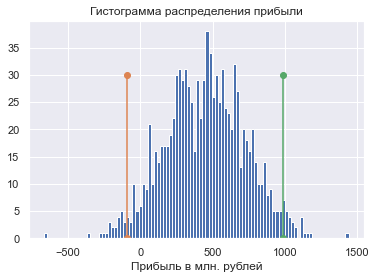

In [152]:
net_income_bootstrap(product_and_predicted_2)

# Вывод: 2-ое месторождение подходит для освоения (уровень рисков < 2.5%)

- В рамки бюджета умещаются все три месторождения для освоения, максимальную прибыль приносят 200 скважин во 2-ом и 3-ем месторождениях (более 400 млн руб). В то время, как в 1-ом - около 300 млн руб.
- Наибольший объем выработки наблюдается в 1-ом и 3-ем регионе. Однако в 3-ем регионе - самая высокая себестоимость освоения месторождения.
- 1-ое и 3-е месторождения обладают высокой вероятностью убытков (11.5% и 4.9% соответственно), поэтому не проходят по критериям установленной бизнес-задачи (вероятность убытков должна быть меньше 2,5 %). Также эта ситуация хорошо описывается 95-% доверительным интервалом. Левая граница, которая отделяет 2.5 % данных для трех регионов принимает отрицательное значение, что говорит о том, что более 2.5 % выборок имеют отрицательную прибыль.
- **Во втором регонне вероятность убытков равна 2.4% и является меньше допустимой, регион подходит по критериям задачи. 2-ое месторождение рекомендовано для освоения в предложенных рамках бюджета и условиях.**

_Thank you for going through this project. Your feedback and comments are very welcome to_ **_ybezginova2021@gmail.com_**

_Thank you!_

_Best wishes,_

_Yulia_